# Final Project

## Loading libraries and Dataset

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import re, string
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("/Users/Lenovo/Desktop/Education/Winter term/COSC-274/dartmouth-cosc-74274-w23-session1-part1/training.csv")

test_df = pd.read_csv("/Users/Lenovo/Desktop/Education/Winter term/COSC-274/dartmouth-cosc-74274-w23-session1-part1/test.csv")

print(train_df.shape)
print(test_df.shape)

(29189, 13)
(4500, 12)


In [3]:
train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive


## Check for Missing Values

In [4]:
train_df.isna().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          4
reviewText            0
summary               5
unixReviewTime        0
vote              23142
image             28589
style             13824
category              0
dtype: int64

In [5]:
na_vote = train_df['vote'].isna().sum()/len(train_df['vote'])
image_na = train_df['image'].isna().sum()/len(train_df['image'])
style_na = train_df['style'].isna().sum()/len(train_df['style'])

print("Missing Values in Vote : {}".format(na_vote))
print("Missing Values in Image : {}".format(image_na))
print("Missing Values in Style : {}".format(style_na))

Missing Values in Vote : 0.792832916509644
Missing Values in Image : 0.9794443112131282
Missing Values in Style : 0.47360306964952553


## Removing Unnecessary Columns

In [6]:
train_df = train_df.drop('vote', axis=1)
train_df = train_df.drop('image', axis=1)
train_df = train_df.drop('style', axis=1)

train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,automotive


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29189 entries, 0 to 29188
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         29189 non-null  int64 
 1   verified        29189 non-null  bool  
 2   reviewTime      29189 non-null  object
 3   reviewerID      29189 non-null  object
 4   asin            29189 non-null  object
 5   reviewerName    29185 non-null  object
 6   reviewText      29189 non-null  object
 7   summary         29184 non-null  object
 8   unixReviewTime  29189 non-null  int64 
 9   category        29189 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 2.0+ MB


## Data Processing

1. The **overall** column is our target variable and it contains numbers from 1 to 5, so based on certain thresholds we will create a new column and put in values like Good, Bad, etc for binary classification.
2. We will then apply some basic NLP techniques in **reviewText** column to get important features.

In [8]:
train_df['productReview'] = train_df['overall'].apply(lambda z: 0 if z <=4 else 1)
train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,productReview
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,automotive,0
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,automotive,0
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,automotive,0
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,automotive,0
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,automotive,0


In [9]:
train_df = train_df.dropna()

## Checking Class Distribution

We will explore the class distribution of **productReview** column to see whether the dataset is imbalanced or not, based on this we will apply the cross-validation techniques.

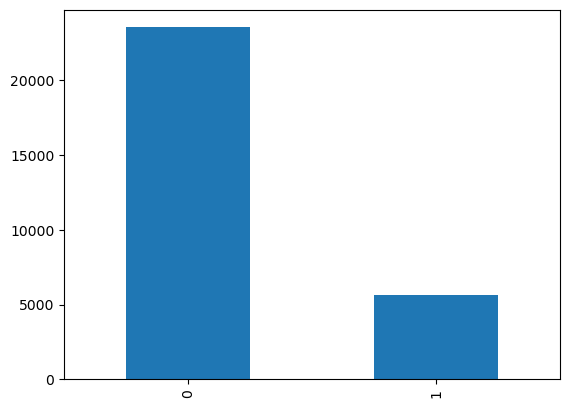

In [10]:
binary_labels = train_df['productReview'].value_counts()

binary_labels.plot.bar()
plt.show()

In [11]:
## preprocess the dataset

def preprocessing(t):
    t = t.lower()
    
    #removing punctuations
    t = t.translate(str.maketrans('','',string.punctuation))
    
    #removing digits
    t = re.sub(r'\d','', t)
    
    #removing whitespaces
    t = t.strip()
    
    return t

train_df['reviewText'] = train_df['reviewText'].apply(preprocessing)

In [12]:
stop_words = ['a', 'an', 'the', 'and', 'but', 'or', 'if', 'because', 'as', 'at', 
              'by', 'for', 'from', 'in', 'into', 'of', 'off', 'on', 
              'onto', 'out', 'over', 'to', 'up', 'with']

train_df['reviewText'] = train_df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Binary Classification

In [13]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

x = train_df['reviewText']
y = train_df['productReview']

count = CountVectorizer()
x_transformed = count.fit_transform(x)

## Logistic Regression

In [14]:
xtrain, xval, ytrain, yval = train_test_split(x_transformed, y, test_size=0.2, random_state=0)

In [15]:
# Model 1
model = LogisticRegression(class_weight='balanced')
model_params = {'C':(1, 10), 'penalty':('l1','l2')}

lr = GridSearchCV(model, model_params, cv=5, scoring="f1_macro")
lr.fit(x_transformed, y)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': (1, 10), 'penalty': ('l1', 'l2')},
             scoring='f1_macro')

In [16]:
# scores = cross_val_score(model, x_transformed, y, cv=5, error_score='raise')
# scores.mean()

print('Best Score : {}'.format(lr.best_score_))
print("Best Parameter : {}".format(lr.best_params_))

Best Score : 0.7203457534393344
Best Parameter : {'C': 1, 'penalty': 'l2'}


In [18]:
print(lr.cv_results_['mean_test_score'])
print(lr.cv_results_['params'])

[       nan 0.72034575        nan 0.71313732]
[{'C': 1, 'penalty': 'l1'}, {'C': 1, 'penalty': 'l2'}, {'C': 10, 'penalty': 'l1'}, {'C': 10, 'penalty': 'l2'}]


In [17]:
lr_model = LogisticRegression(C=1, class_weight='balanced', penalty='l2')
lr_model.fit(xtrain, ytrain)

ypred = lr_model.predict(xval)
ypred_proba = lr_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred)

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.7822985619721525
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4718
           1       0.51      0.73      0.60      1118

    accuracy                           0.81      5836
   macro avg       0.72      0.78      0.74      5836
weighted avg       0.85      0.81      0.83      5836



Text(0, 0.5, 'True Positives Rate')

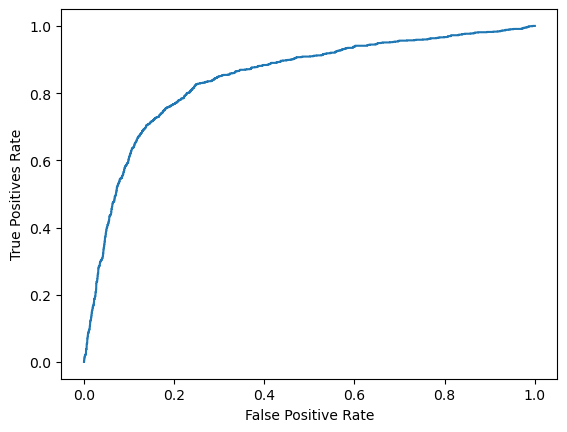

In [18]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

In [20]:
xtest = test_df['reviewText']
xtest_transformed = count.transform(xtest)


preds = lr_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

,id,predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [21]:
subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/logistic_regression_preds_baseline4.csv', index=False)

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')

In [20]:
dtc_params = {'criterion':['gini', 'entropy'], 'max_depth':[None,3,5], 'splitter':['best','random']}

grid_dtc_model = GridSearchCV(dtc, dtc_params,cv=5, scoring="f1_macro")
grid_dtc_model.fit(x_transformed,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5],
                         'splitter': ['best', 'random']},
             scoring='f1_macro')

In [21]:
print('Best Score : {}'.format(grid_dtc_model.best_score_))
print("Best Parameter : {}".format(grid_dtc_model.best_params_))

Best Score : 0.6587951496794375
Best Parameter : {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}


In [22]:
print('Score : {}'.format(grid_dtc_model.cv_results_['mean_test_score']))
print("Parameter : {}".format(grid_dtc_model.cv_results_['params']))

Score : [0.65435949 0.65614818 0.46312405 0.44414579 0.5643431  0.58099451
 0.65477449 0.65879515 0.46471852 0.47198258 0.56708111 0.53069816]
Parameter : [{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}, {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}, {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}, {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}, {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}, {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}, {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}]


In [25]:
dt_model = DecisionTreeClassifier(criterion='gini', splitter='random',class_weight='balanced')
dt_model.fit(xtrain, ytrain)

ypred = dt_model.predict(xval)
ypred_proba = dt_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
print('Classification Report:\n{}'.format(cfr))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4718
           1       0.42      0.52      0.46      1118

    accuracy                           0.77      5836
   macro avg       0.65      0.67      0.66      5836
weighted avg       0.79      0.77      0.78      5836



Text(0, 0.5, 'True Positives Rate')

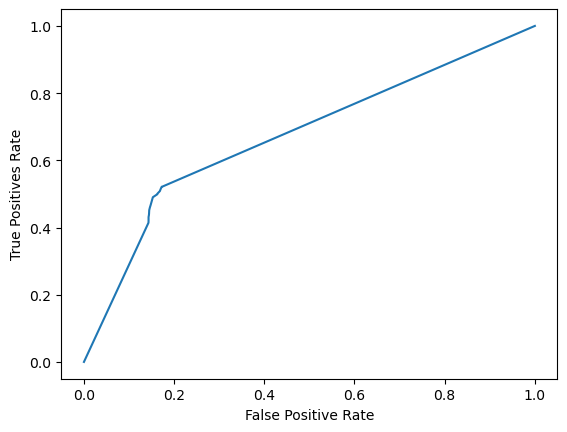

In [26]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

In [27]:
# xtest = test_df['reviewText']
# xtest_transformed = tfidf.transform(xtest)

preds = dt_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

,id,predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [28]:
# subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/decision_tree_baseline1.csv', index=False)

## Extra Tree Classifier

In [23]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier(class_weight='balanced')
etc_params = {'criterion':['gini', 'entropy'], 'max_depth':[None,2,4], 'min_samples_leaf':[1,3,5],
               'max_features':["auto","log2","sqr2"]}

grid_etc_model = GridSearchCV(etc, etc_params,cv=5, scoring="f1_macro")
grid_etc_model.fit(x_transformed,y)

GridSearchCV(cv=5, estimator=ExtraTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4],
                         'max_features': ['auto', 'log2', 'sqr2'],
                         'min_samples_leaf': [1, 3, 5]},
             scoring='f1_macro')

In [24]:
print('Best Score : {}'.format(grid_etc_model.best_score_))
print("Best Parameter : {}".format(grid_etc_model.best_params_))

Best Score : 0.6233517030009488
Best Parameter : {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1}


In [25]:
print('Score : {}'.format(grid_etc_model.cv_results_['mean_test_score']))
print("Parameter : {}".format(grid_etc_model.cv_results_['params']))

Score : [0.61699977 0.60305985 0.56883032 0.59266371 0.16980265 0.17042563
        nan        nan        nan 0.18093227 0.29067909 0.23255508
 0.27621231 0.23050592 0.39001581        nan        nan        nan
 0.28454613 0.28885375 0.25777878 0.28822222 0.27614224 0.22900492
        nan        nan        nan 0.6233517  0.58265635 0.58188314
 0.59188181 0.17413924 0.17022422        nan        nan        nan
 0.24856557 0.20092242 0.23628655 0.33311957 0.22129872 0.2758837
        nan        nan        nan 0.22700198 0.18192211 0.17758389
 0.27897932 0.22115713 0.27723561        nan        nan        nan]
Parameter : [{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1}, {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3}, {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5}, {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1}, {'criterion': 'gini'

In [31]:
etc_model = ExtraTreeClassifier(criterion='gini', class_weight='balanced', max_depth=None, max_features='auto')
etc_model.fit(xtrain, ytrain)

ypred = etc_model.predict(xval)
ypred_proba = etc_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred)

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.6400611671814487
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4718
           1       0.41      0.43      0.42      1118

    accuracy                           0.77      5836
   macro avg       0.63      0.64      0.64      5836
weighted avg       0.78      0.77      0.77      5836



Text(0, 0.5, 'True Positives Rate')

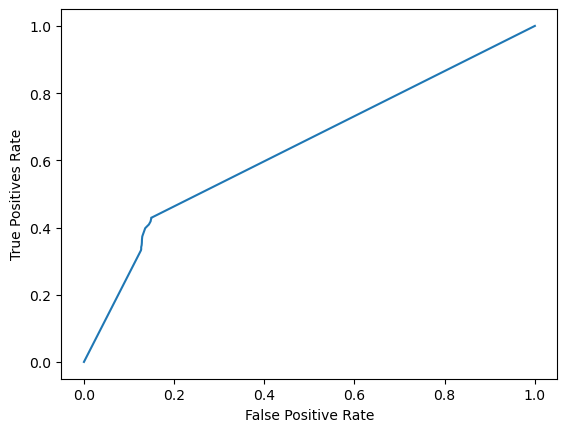

In [32]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')